# PPI with l_vstr seed

In [1]:
from nilearn import plotting
import glob
import os

data_loc = os.environ['DATA_LOC']

## Model 1: Any increased connectivity for any condition?

Nothing survives permutation tests

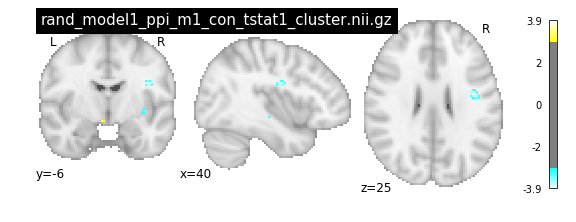

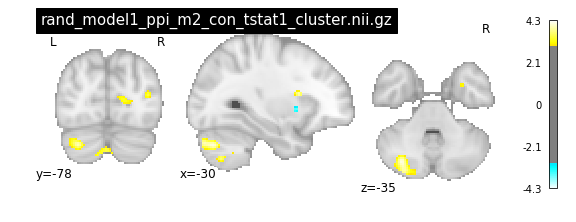

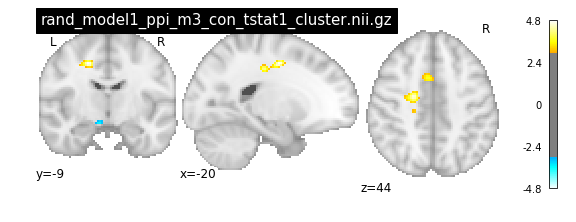

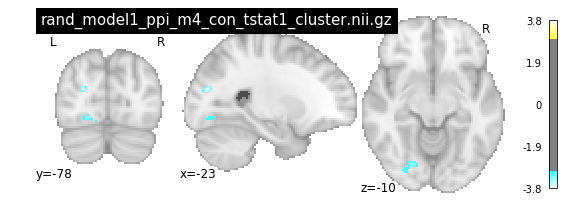

In [9]:
plot_paths = glob.glob('%s/derivatives/func_con/ppi/level_3/model1/*/rand_model1_ppi_*_con_tstat1_cluster.nii.gz'%(data_loc))
plot_paths.sort()

for i in range(0, len(plot_paths)):
    plotting.plot_stat_map(plot_paths[i], colorbar=True, title=os.path.basename(plot_paths[i]), threshold=3, draw_cross=False)
    
    

## Model 2: Age differences in connectivity

Nothing survives permutation tests

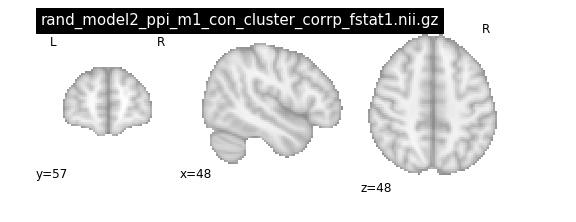

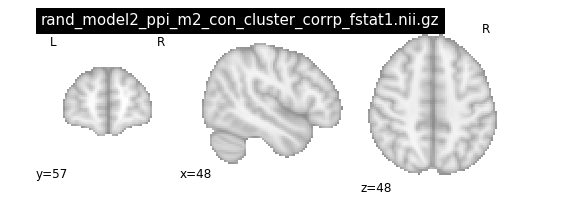

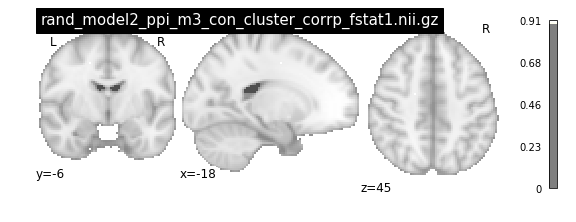

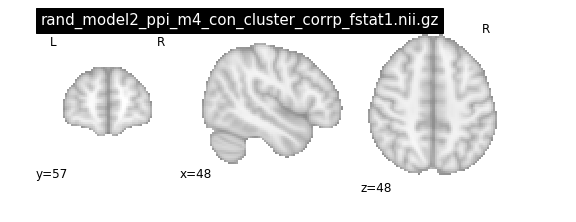

In [12]:
plot_paths = glob.glob('%s/derivatives/func_con/ppi/level_3/model2/*/rand_model2_ppi_*_con_cluster_corrp_fstat1.nii.gz'%(data_loc))
plot_paths.sort()

for i in range(0, len(plot_paths)):
    plotting.plot_stat_map(plot_paths[i], colorbar=True, title=os.path.basename(plot_paths[i]), threshold=.9, draw_cross=False)

## Model 3: Learner differences in connectivity

Nothing survives permutation tests

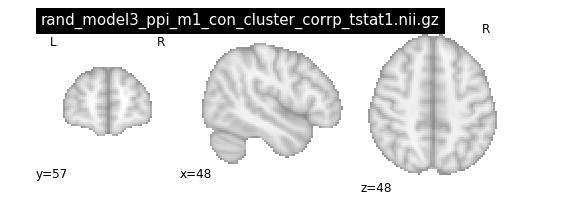

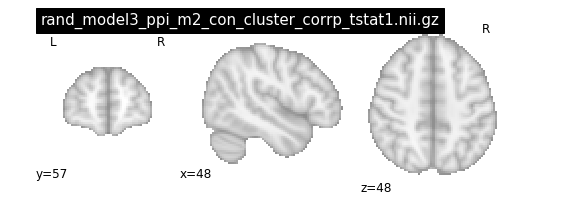

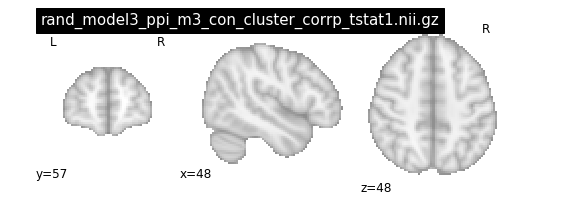

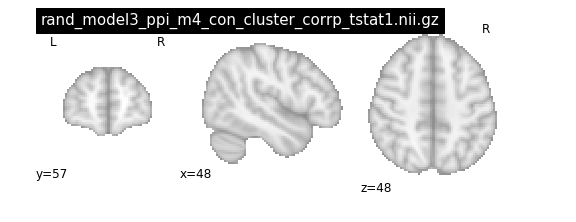

In [15]:
plot_paths = glob.glob('%s/derivatives/func_con/ppi/level_3/model3/*/rand_model3_ppi_*_con_cluster_corrp_tstat1.nii.gz'%(data_loc))
plot_paths.sort()

for i in range(0, len(plot_paths)):
    plotting.plot_stat_map(plot_paths[i], colorbar=True, title=os.path.basename(plot_paths[i]), threshold=.9, draw_cross=False)

# Seed2vox 
## Example code

Following the example in: https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html#sphx-glr-auto-examples-03-connectivity-plot-seed-to-voxel-correlation-py

In [1]:
from nilearn import datasets
from nilearn import plotting
from nilearn import input_data
import numpy as np

In [2]:
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
func_filename = adhd_dataset.func[0]
confound_filename = adhd_dataset.confounds[0]

In [3]:
pcc_coords = [(0, -52, 18)]

In [4]:
seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.,
    memory='nilearn_cache', memory_level=1, verbose=0)

In [5]:
seed_time_series = seed_masker.fit_transform(func_filename,
                                             confounds=[confound_filename])

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [6]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.,
    memory='nilearn_cache', memory_level=1, verbose=0)

In [7]:
brain_time_series = brain_masker.fit_transform(func_filename,
                                               confounds=[confound_filename])

In [8]:
seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

In [9]:
seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)

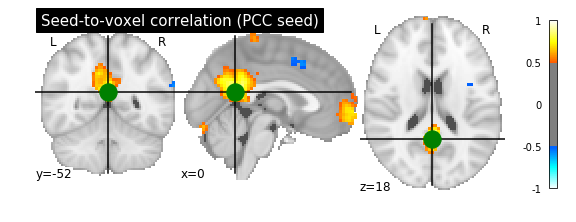

In [10]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (PCC seed)"
                                 )
display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=300)

## Modified code for me

In [11]:
import os
import sys
import pandas as pd
from nilearn import input_data, plotting
import numpy as np
sys.path.append(os.path.join(os.environ['SERVER_SCRIPTS'],'nistats/level_1'))
from level_1_utils import get_confounds

data_loc = os.environ['DATA_LOC']
subnum = '400742'
runnum = '002'
func_filename = '%s/derivatives/fmriprep_1.4.0/fmriprep/sub-%s/func/sub-%s_task-machinegame_run-%s_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' %(data_loc, subnum, subnum, runnum)
formatted_confounds = get_confounds(pd.read_csv(os.path.join(data_loc,"derivatives/fmriprep_1.4.0/fmriprep/sub-%s/func/sub-%s_task-machinegame_run-%s_desc-confounds_regressors.tsv"%(subnum, subnum, runnum)), sep='\t'))


/oak/stanford/groups/russpold/users/zenkavi/DevStudy_ServerScripts/nistats/level_1/level_1_utils.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  formatted_confounds[where_are_NaNs] = 0
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [12]:
l_vstr_coords = [(-12, 12, -6)]

seed_masker = input_data.NiftiSpheresMasker(
    l_vstr_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.,
    memory='nilearn_cache', memory_level=1, verbose=0)

#Not sure if formatted confounds should be in list since it is an array like object here and not a filename as above
seed_time_series = seed_masker.fit_transform(func_filename,
                                             confounds=formatted_confounds.values)

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [21]:
seed_time_series.flatten()

array([-0.86523235, -0.5323079 , -0.23865521, -0.02106815,  0.0931593 ,
        0.08736946, -0.04408381, -0.29432216, -0.64029217, -1.0376078 ,
       -1.4179628 , -1.6960602 , -1.7902287 , -1.6519657 , -1.2913067 ,
       -0.7841635 , -0.25530764,  0.15828714,  0.35033676,  0.27858335,
       -0.02285209, -0.4554963 , -0.88830525, -1.1984181 , -1.3069693 ,
       -1.1978613 , -0.9145334 , -0.5387571 , -0.16163172,  0.1417788 ,
        0.32620525,  0.37718272,  0.3044717 ,  0.1343954 , -0.09581207,
       -0.3420879 , -0.5575348 , -0.69774824, -0.7285597 , -0.63543665,
       -0.43081945, -0.15427257,  0.1376841 ,  0.39033172,  0.57062495,
        0.6777031 ,  0.73698896,  0.77995276,  0.8202972 ,  0.8394646 ,
        0.78924614,  0.6106746 ,  0.26116446, -0.26086476, -0.9033268 ,
       -1.5659645 , -2.1253686 , -2.473341  , -2.554322  , -2.3849936 ,
       -2.0458264 , -1.6471033 , -1.2839669 , -1.0006143 , -0.78028685,
       -0.56593794, -0.30150416,  0.02688969,  0.37136272,  0.63

In [ ]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_series = brain_masker.fit_transform(func_filename,
                                               confounds=formatted_confounds.values)

In [ ]:
seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)

In [ ]:
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

In [ ]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=l_vstr_coords[0],
                                 title="Seed-to-voxel correlation (l-vStr seed)",
                                 draw_cross=False
                                 )
display.add_markers(marker_coords=l_vstr_coords, marker_color='g',
                    marker_size=100)

## Check results

In [ ]:
from nilearn import plotting, input_data
import numpy as np
import os
import nibabel as nib
import pandas as pd
import glob
from nilearn.image import mean_img
import re

In [ ]:
data_loc = os.environ['DATA_LOC']
subnum = '306065'
runnum = '002'
l_vstr_coords = [(-12, 12, -6)]

Min/max cor values for a single subject single run

In [ ]:
run_img = nib.load('%s/derivatives/func_con/sub-%s/sub-%s_run-%s_l_vstr_cor_img.nii.gz'%(data_loc, subnum, subnum, runnum))

print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (run_img.get_fdata().min(), run_img.get_fdata().max()))


Plot for a single subject single run

In [ ]:
display = plotting.plot_stat_map(run_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=l_vstr_coords[0],
                                 title="Seed-to-voxel correlation (l-vStr seed)",
                                 draw_cross=False
                                 )
display.add_markers(marker_coords=l_vstr_coords, marker_color='g',
                    marker_size=100)
#display.savefig('sub-%s_run-%s_l_vstr_seed_correlation.pdf'%(subnum, runnum))

Min/max cor values for a subjcet average image

In [ ]:
sub_img = nib.load('%s/derivatives/func_con/sub-%s/sub-%s_run-ave_l_vstr_cor_img.nii.gz'%(data_loc, subnum, subnum))

print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (sub_img.get_fdata().min(), sub_img.get_fdata().max()))


Plot for a subject average image

In [ ]:
display = plotting.plot_stat_map(sub_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=l_vstr_coords[0],
                                 title="Seed-to-voxel correlation (l-vStr seed)",
                                 draw_cross=False
                                 )
display.add_markers(marker_coords=l_vstr_coords, marker_color='g',
                    marker_size=100)
#display.savefig('sub-%s_run-ave_l_vstr_seed_correlation.pdf'%(subnum))

Average image for learners

In [ ]:
server_scripts = os.environ['SERVER_SCRIPTS']
learner_info = pd.read_csv('%s/nistats/level_3/learner_info.csv'%(server_scripts))

In [ ]:
learners = list(learner_info.query('learner==1').Sub_id)
non_learners = list(learner_info.query('learner==0').Sub_id)

In [ ]:
all_cor_images = glob.glob('%s/derivatives/func_con/sub-*/sub-*_run-*_l_vstr_cor_img.nii.gz'%(data_loc))
all_cor_images = [x for x in all_cor_images if "ave" not in x]

In [ ]:
learner_cor_images = [s for s in all_cor_images if any(xs in s for xs in learners)]
non_learner_cor_images = [s for s in all_cor_images if any(xs in s for xs in non_learners)]

In [ ]:
learner_mean_cor_img = mean_img(learner_cor_images)

In [ ]:
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (learner_mean_cor_img.get_fdata().min(), learner_mean_cor_img.get_fdata().max()))

In [ ]:
display = plotting.plot_stat_map(learner_mean_cor_img,
                                 threshold=0.4, vmax=1,
                                 cut_coords=l_vstr_coords[0],
                                 title="Seed-to-voxel correlation (l-vStr seed)",
                                 draw_cross=False
                                 )
display.add_markers(marker_coords=l_vstr_coords, marker_color='g',
                    marker_size=100)
#display.savefig('learner_l_vstr_seed_correlation.pdf')

Average image for non-learners

In [ ]:
non_learner_mean_cor_img = mean_img(non_learner_cor_images)

In [ ]:
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (non_learner_mean_cor_img.get_fdata().min(), non_learner_mean_cor_img.get_fdata().max()))

In [ ]:
display = plotting.plot_stat_map(learner_mean_cor_img,
                                 threshold=0.3, vmax=1,
                                 cut_coords=l_vstr_coords[0],
                                 title="Seed-to-voxel correlation (l-vStr seed)",
                                 draw_cross=False
                                 )
display.add_markers(marker_coords=l_vstr_coords, marker_color='g',
                    marker_size=100)
display.savefig('non_learner_l_vstr_seed_correlation.pdf')

Correlation with other ROIs per subject

In [ ]:
import sys
sys.path.append(os.path.join(os.environ['SERVER_SCRIPTS'],'roi'))
from get_roi_vals import get_roi_vals

In [ ]:
regions = ['r_vstr', 'vmpfc', 'r_ains', 'l_ains', 'acc', 'pcc', 'pre_sma', 'r_dstr']
all_cors = pd.DataFrame()

all_cor_images = glob.glob('%s/derivatives/func_con/sub-*/sub-*_run-*_l_vstr_cor_img.nii.gz'%(data_loc))
all_cor_images = [x for x in all_cor_images if "ave" not in x]
all_cor_images.sort()

for region in regions:
    mask_file_name = '%s/derivatives/rois/tpl-MNI152NLin2009cAsym_res-02_desc-brain_T1w/%s_bin.nii.gz'%(data_loc, region)

    print("Getting cors from %s"%(region))

    for cur_cor_img in all_cor_images:
        print("Getting cors for sub-%s"%(re.findall('\d+', os.path.basename(cur_cor_img))[0]))
        cur_cors = pd.DataFrame()
        cur_cors["cor"] = get_roi_vals(mask_file_name, cur_cor_img)
        cur_cors["sub_num"] = re.findall('\d+', os.path.basename(cur_cor_img))[0] #take from cur_beta_img
        cur_cors["run_num"] = re.findall('\d+', os.path.basename(cur_cor_img))[1] #take from cur_beta_img
        cur_cors["roi"] = region
        all_cors = all_cors.append(cur_cors, ignore_index= True)

In [ ]:
all_cors.to_csv('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/func_con/all_l_vstr_cors.csv')

# Seed2seed

Modified from [here](https://github.com/miykael/workshop_cambridge/blob/master/notebooks/functional_connectivity.ipynb).

In [22]:
import os
import sys
import pandas as pd
from nilearn import input_data, plotting
import numpy as np
sys.path.append(os.path.join(os.environ['SERVER_SCRIPTS'],'nistats/level_1'))
from level_1_utils import get_confounds

data_loc = os.environ['DATA_LOC']
subnum = '400742'
runnum = '002'
func_filename = '%s/derivatives/fmriprep_1.4.0/fmriprep/sub-%s/func/sub-%s_task-machinegame_run-%s_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' %(data_loc, subnum, subnum, runnum)
formatted_confounds = get_confounds(pd.read_csv(os.path.join(data_loc,"derivatives/fmriprep_1.4.0/fmriprep/sub-%s/func/sub-%s_task-machinegame_run-%s_desc-confounds_regressors.tsv"%(subnum, subnum, runnum)), sep='\t'))

/oak/stanford/groups/russpold/users/zenkavi/DevStudy_ServerScripts/nistats/level_1/level_1_utils.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  formatted_confounds[where_are_NaNs] = 0
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [23]:
# Sphere radius in mm
sphere_radius = 8

# Sphere center in MNI-coordinate
#sphere_center = [(  0, -52, 18),
#                 (-46, -68, 32),
#                 ( 46, -68, 32),
#                 (  1,  50, -5)]

#sphere_center = pd.read_csv('%s/roi/sv_roi_centers.csv'%(os.environ['SERVER_SCRIPTS']))[["x", "y", "z"]].values
sphere_center = [(-12,  12,  -6),
       ( 12,  10,  -6),
       (  2,  46,  -8),
       (-30,  22,  -6),
       ( 32,  20,  -6),
       ( -4, -30,  36),
       ( -2,  28,  28),
       ( -2,  16,  46),
       ( 18,  15,  15)]

In [24]:
# Create masker object to extract average signal within spheres
from nilearn.input_data import NiftiSpheresMasker
masker = NiftiSpheresMasker(sphere_center, radius=sphere_radius, detrend=True,
                            standardize=True, low_pass=0.1, high_pass=0.01,
                            t_r=1.0, verbose=1, memory="nilearn_cache", memory_level=2)

In [25]:
# Extract average signal in spheres with masker object
time_series = masker.fit_transform(func_filename, confounds=formatted_confounds.values)

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/fmriprep_1.4.0/fmriprep/sub-400742/func/sub-400742_task-machinegame_run-002_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [ (-12, 12, -6),
             (12, 10, -6),
             (2, 46, -8),
             (-30, 22, -6),
             (32, 20, -6),
             (-4, -30, 36),
             (-2, 28, 28),
             (-2, 16, 46),
             (18, 15, 15)],
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 1.0}, verbose=1, memory=Memory(cachedir='nilearn_cache/joblib'), dtype=None, memory_level=2, confounds=array([[-0.020682, ...,  0.      ],
       ...,
       [ 0.158648, ...,  0.      ]]))
[NiftiS

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


__________________________________nifti_spheres_masker_extractor - 25.9s, 0.4min
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.signal.clean...
clean(array([[11099.725, ..., 10681.204],
       ...,
       [11028.284, ..., 10631.712]], dtype=float32), detrend=True, high_pass=0.01, sessions=None, confounds=array([[-0.020682, ...,  0.      ],
       ...,
       [ 0.158648, ...,  0.      ]]), low_pass=0.1, t_r=1.0, standardize=True)
____________________________________________________________clean - 0.0s, 0.0min
______________________________________________filter_and_extract - 36.4s, 0.6min


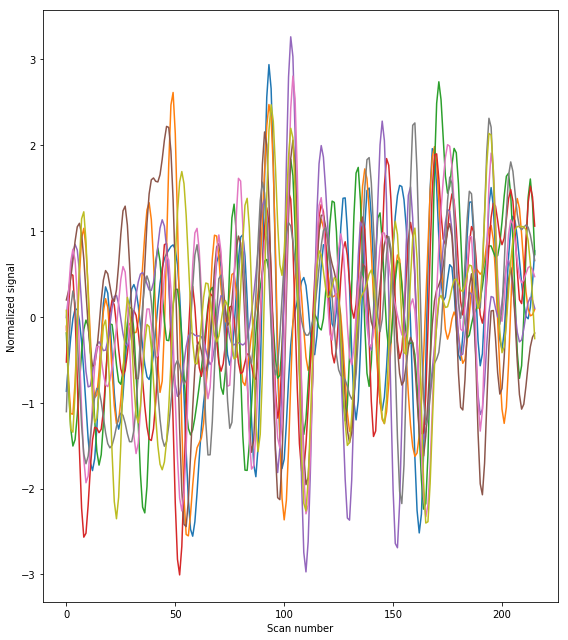

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 9))
plt.plot(time_series)
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout();

In [27]:
from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform([time_series])[0]

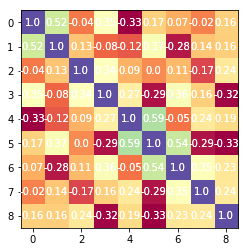

In [28]:
# Plotting the partical correlation matrix
fig, ax = plt.subplots()
plt.imshow(partial_correlation_matrix, cmap='Spectral')
for (j,i),label in np.ndenumerate(partial_correlation_matrix):
    ax.text(i, j, round(label, 2), ha='center', va='center', color='w')
    ax.text(i, j, round(label, 2), ha='center', va='center', color='w')

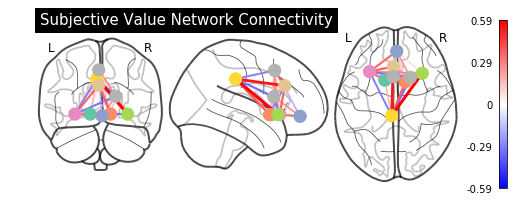

In [29]:
from nilearn.plotting import plot_connectome
plot_connectome(partial_correlation_matrix, sphere_center,
                display_mode='ortho', colorbar=True,  node_size=150,
                title="Subjective Value Network Connectivity")

In [ ]:
partial_correlation_matrix